In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('customer_churn.csv',na_values=' ')

In [177]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

We have 7043 rows and 21 columns in oour dataset.

In [179]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We have 11 missing values in TotalCharges column.

In [180]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

We can see SeniorCitizen is already encoded.MonthlyCharges, tenure and TotalCharges are numeric features. Rest of the features are categorical.

In [181]:
for i in df.columns:
    print(i,df[i].nunique())

customerID 7043
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 73
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1585
TotalCharges 6530
Churn 2


<AxesSubplot:xlabel='gender', ylabel='count'>

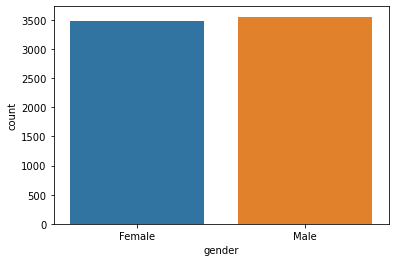

In [182]:
sns.countplot(df['gender'])

NUmber of females and males availing the services are almost equal.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

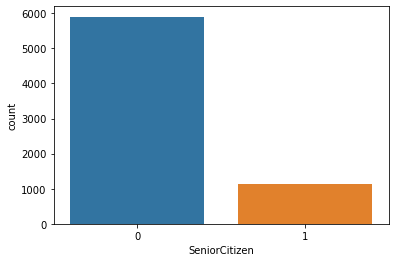

In [12]:
sns.countplot(df['SeniorCitizen'])

Only few customers are senior citizen.

<AxesSubplot:xlabel='Partner', ylabel='count'>

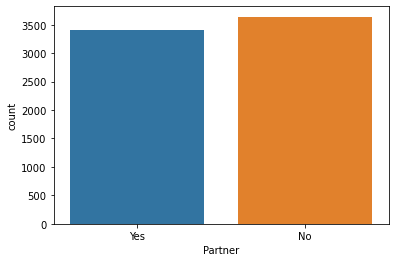

In [13]:
sns.countplot(df['Partner'])

Approximately 3300 customers have partner while 3500 customer have no partner. There is no big difference between them.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

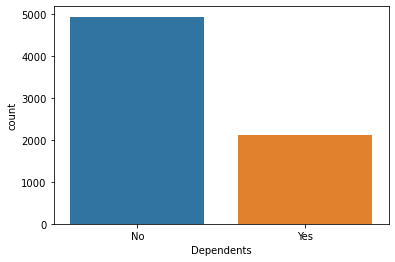

In [14]:
sns.countplot(df['Dependents'])

Majority of the customer have no dependents.

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

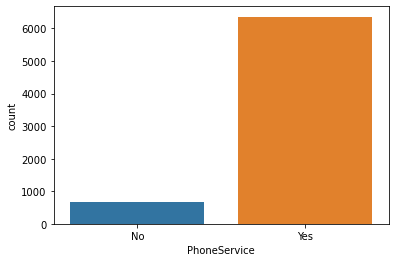

In [15]:
sns.countplot(df['PhoneService'])

Majority of the customers have phone service available.

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

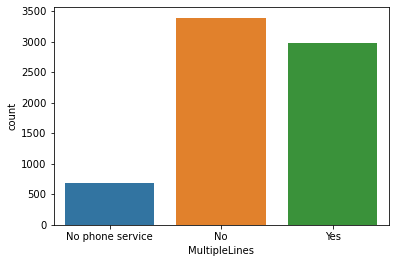

In [16]:
sns.countplot(df['MultipleLines'])

Almost 3000 people have multiple lines which might be one of the reason of customer churn.

<AxesSubplot:xlabel='InternetService', ylabel='count'>

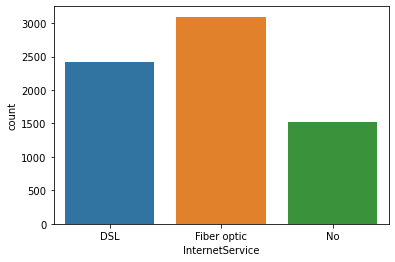

In [17]:
sns.countplot(df['InternetService'])

Most of the customer have fiberoptic internet service while some have opted for DSL.

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

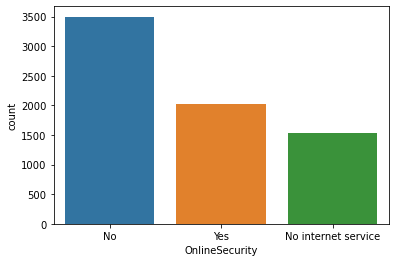

In [18]:
sns.countplot(df['OnlineSecurity'])

Most of the customers have no online security.

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

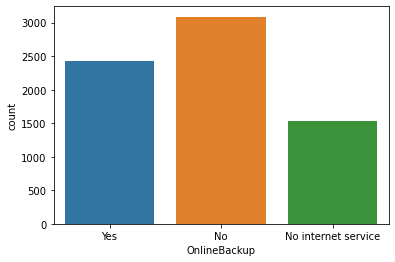

In [19]:
sns.countplot(df['OnlineBackup'])

Most of the customer have no online backup.

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

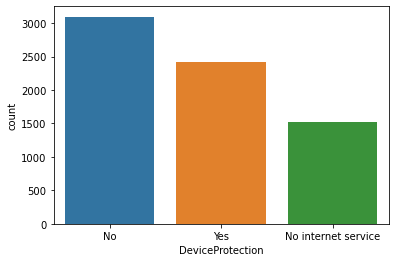

In [20]:
sns.countplot(df['DeviceProtection'])

Majority of the people have no device protection.

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

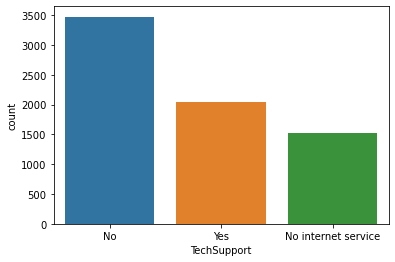

In [21]:
sns.countplot(df['TechSupport'])

Most of the people have tech support available.

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

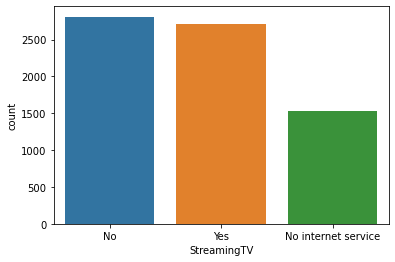

In [22]:
sns.countplot(df['StreamingTV'])

We have almost equal number of customers who have opted for streaming TV.

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

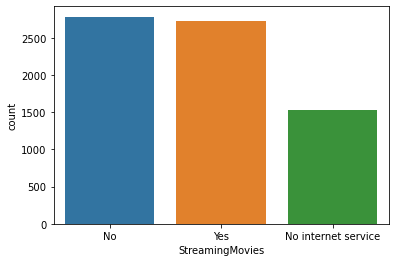

In [23]:
sns.countplot(df['StreamingMovies'])

We have almost equal number of customers who have opted for streaming Movies.

<AxesSubplot:xlabel='Contract', ylabel='count'>

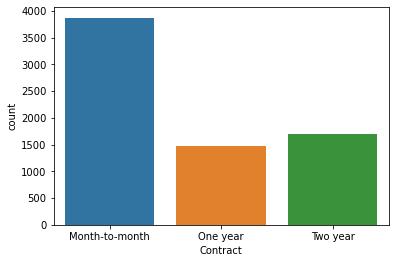

In [24]:
sns.countplot(df['Contract'])

Majority of the customers pay their bills monthly, very few opts for one year or two year contract

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

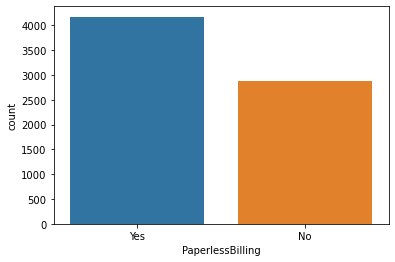

In [25]:
sns.countplot(df['PaperlessBilling'])

Most of the companies give paperless billing option.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

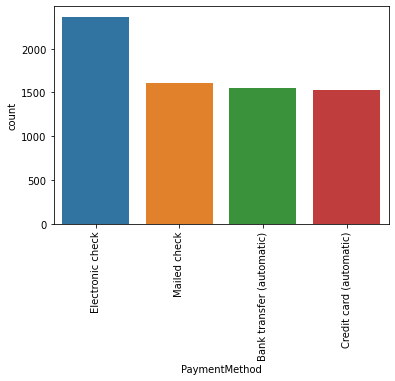

In [28]:
sns.countplot(df['PaymentMethod'])
plt.xticks(rotation=90)

Majority of the people pay their bills through Electronic check. While few opted for Mailed check, Bank transfer and credit card.

<AxesSubplot:xlabel='Churn', ylabel='count'>

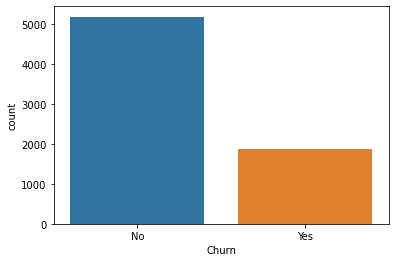

In [27]:
sns.countplot(df['Churn'])

Our target variable is highly imbalanced. We will have to balance it before modelevaluation.

<AxesSubplot:ylabel='Frequency'>

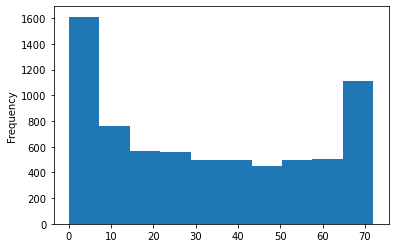

In [29]:
df['tenure'].plot.hist()

Most of the customers opted for a service for 0-10 years or more than 60 years.

<AxesSubplot:ylabel='Frequency'>

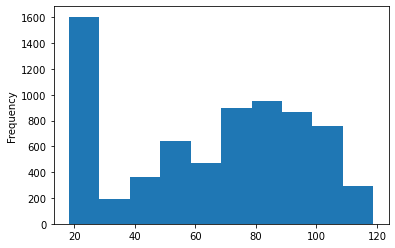

In [30]:
df['MonthlyCharges'].plot.hist()

Most of the customers are paying 20 rs for a month. while some of them are paying more than 70 rs.

In [7]:
#Replacing missing values with mean
df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace=True)

In [8]:
#As TotalCharges is numeric column we will convert it into float
df['TotalCharges']=df['TotalCharges'].astype(float)

In [185]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


1. We can see all the data is skewed.

2. Difference in 75th percetile and max value shows presence of outliers

In [9]:
#Separating the categorical columns
cat_features = df.select_dtypes(include=[np.object])
num_features=df.select_dtypes(include=[np.number])

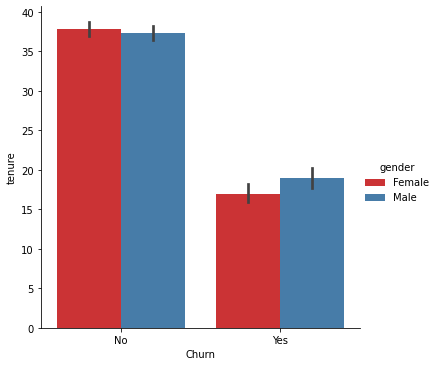

In [68]:
sns.catplot(x="Churn", y="tenure", hue="gender",palette="Set1", kind="bar", data=df)

We can see male are more likely to discard the service than females.

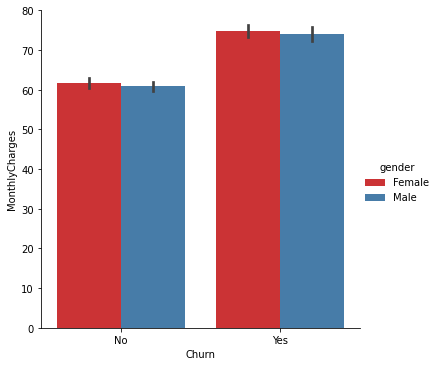

In [67]:
sns.catplot(x="Churn", y="MonthlyCharges", hue="gender", palette="Set1",kind="bar", data=df)

We cannot predict anything accurate from this chart.

<AxesSubplot:xlabel='gender', ylabel='count'>

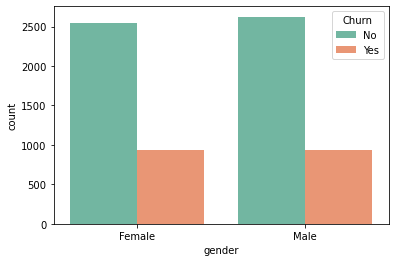

In [76]:
sns.countplot(x=df['gender'],hue=df['Churn'],palette="Set2")

We can see there is same behaviour of males and females for churn.

<AxesSubplot:xlabel='Partner', ylabel='count'>

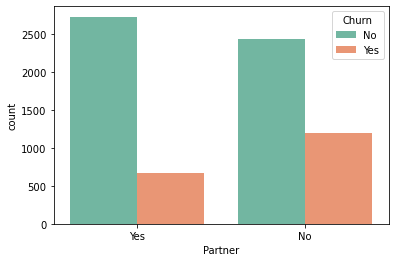

In [77]:
sns.countplot(x=df['Partner'],hue=df['Churn'],palette="Set2")

Customers with no partner are likely to churn from the service

<AxesSubplot:xlabel='Dependents', ylabel='count'>

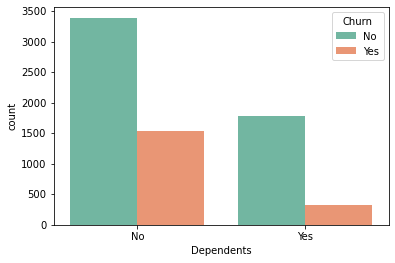

In [78]:
sns.countplot(x=df['Dependents'],hue=df['Churn'],palette="Set2")

People with dependents are very less likely to churn out of the service

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

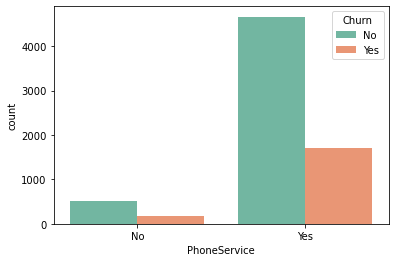

In [79]:
sns.countplot(x=df['PhoneService'],hue=df['Churn'],palette="Set2")

We can see customer with phone service are more likely to stay with the service than with no phone sevice

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

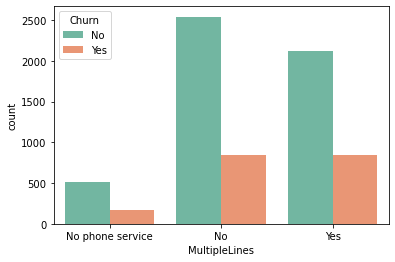

In [80]:
sns.countplot(x=df['MultipleLines'],hue=df['Churn'],palette="Set2")

People are multiple lines are more likely to churn out of service.

<AxesSubplot:xlabel='InternetService', ylabel='count'>

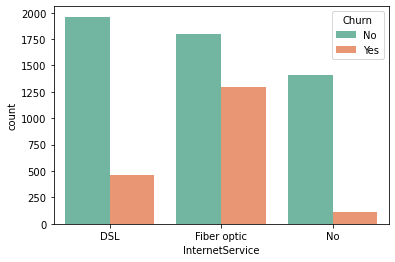

In [81]:
sns.countplot(x=df['InternetService'],hue=df['Churn'],palette="Set2")

People are No Internet service and DSL internet service churn less than people who opts for Fiber optic.

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

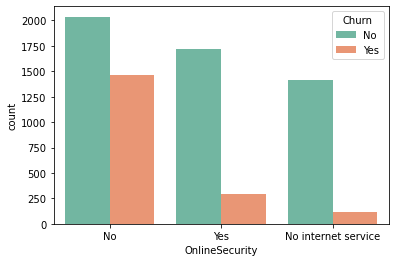

In [82]:
sns.countplot(x=df['OnlineSecurity'],hue=df['Churn'],palette="Set2")

People with no online security churn ut of service more often while people with online security are likely to stay with the service.

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

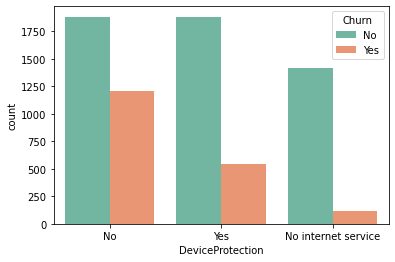

In [84]:
sns.countplot(x=df['DeviceProtection'],hue=df['Churn'],palette="Set2")

People who have device protection are likely to continure with the service than people with no device protection

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

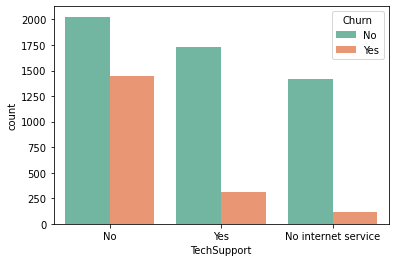

In [85]:
sns.countplot(x=df['TechSupport'],hue=df['Churn'],palette="Set2")

People who have tech support are likely to continure with the service than people with no tech support

<AxesSubplot:xlabel='Contract', ylabel='count'>

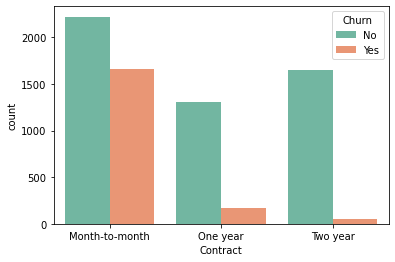

In [88]:
sns.countplot(x=df['Contract'],hue=df['Churn'],palette="Set2")

People who have one or two year contract are very less likely to churn out of the service.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

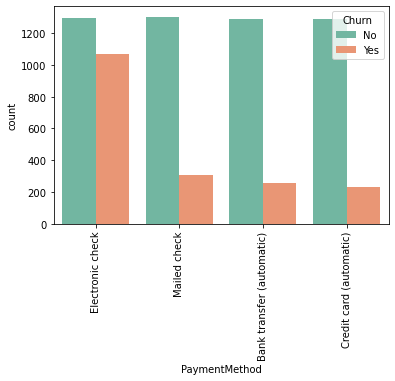

In [91]:
sns.countplot(x=df['PaymentMethod'],hue=df['Churn'],palette="Set2")
plt.xticks(rotation=90)

People who pay via Electronic check are more likely to churn out of service.

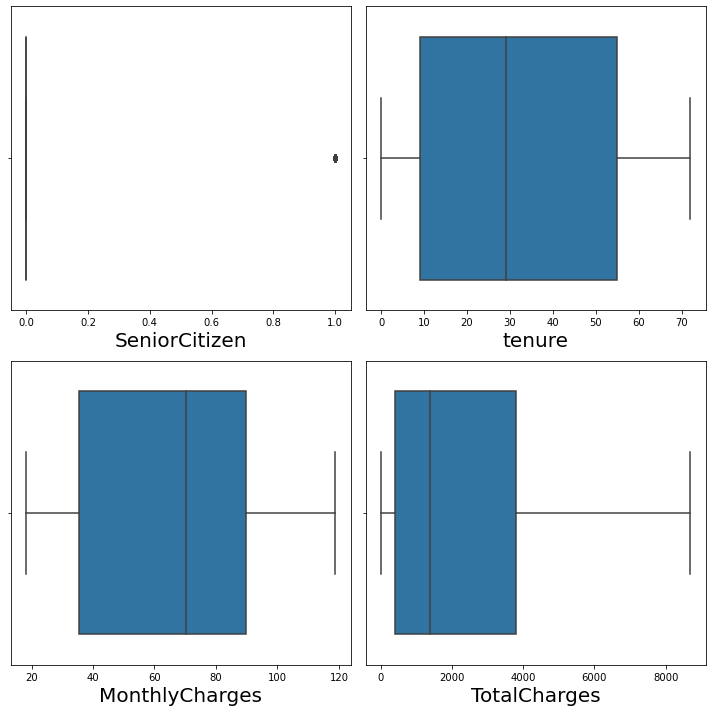

In [98]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_features:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(num_features[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()  

We can see there are no outliers present in any of the column.

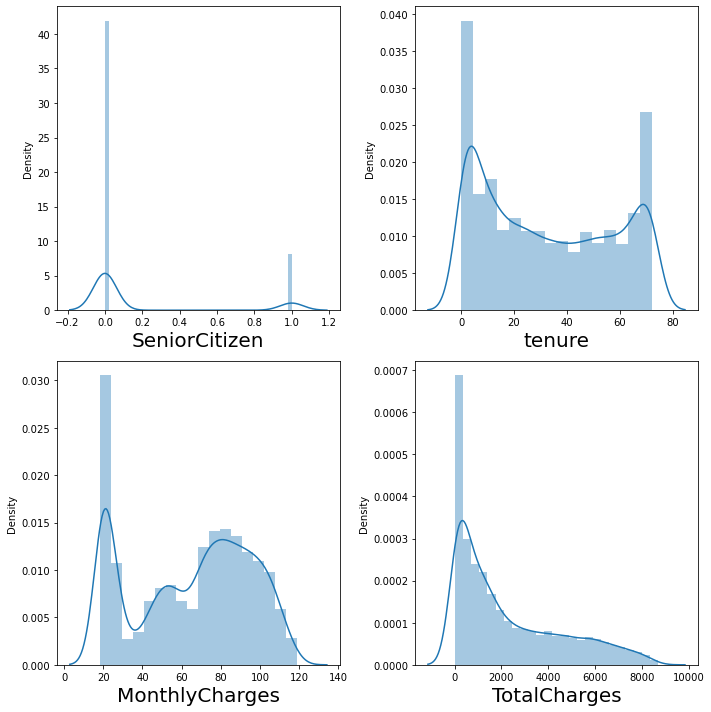

In [99]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_features:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(num_features[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout() 

We can see other than TotalCharges, all other columns are normally distributed.

In [10]:
#Checking the skewness
num_features.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

In [11]:
#Treating the skewness of TotalCharges
df['TotalCharges']=np.sqrt(df['TotalCharges'])

In [12]:
df['TotalCharges'].skew()

0.30784903124051693

In [13]:
#Performing Label Encoding for the dataset
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=label_encoder.fit_transform(df[i])

In [192]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,5.463515,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,43.468379,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,10.399519,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,42.903963,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,12.314625,1


In [14]:
#Lets bring all the numeric values to a common level
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df[['tenure','MonthlyCharges','TotalCharges']]=ss.fit_transform(df[['tenure','MonthlyCharges','TotalCharges']])

In [15]:
#Separating x and y for model evaluation
x=df.drop(['Churn','customerID'],axis=1)
y=df[['Churn']]

In [216]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-1.449636
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,0.100180
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-1.248349
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,0.077163
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-1.170252


#### Treating class imbalance in target variable

In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)

In [219]:
y_over.value_counts()

Churn
1        5174
0        5174
dtype: int64

In [220]:
x_over.shape

(10348, 19)

In [221]:
y_over.shape

(10348, 1)

### Finding the best Random State:

In [18]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    predrf=lg.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS) 

Best accuracy is  0.794524959742351  on Random_state  102


### Model Evaluation:

In [19]:
#splitting data into training and testing datasets
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=maxRS)

0.7594202898550725
[[1183  387]
 [ 360 1175]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1570
           1       0.75      0.77      0.76      1535

    accuracy                           0.76      3105
   macro avg       0.76      0.76      0.76      3105
weighted avg       0.76      0.76      0.76      3105



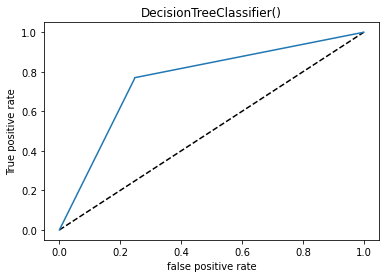

auc_score: 0.7594877487084793




In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=dtc)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(dtc)
plt.show()
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
print("auc_score:" ,auc_score)
print("\n")

0.8479871175523349
[[1260  273]
 [ 199 1373]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1533
           1       0.83      0.87      0.85      1572

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



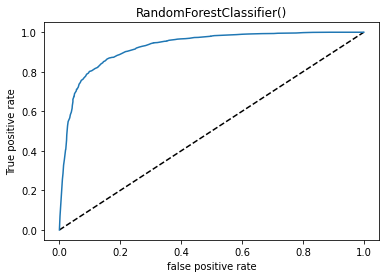

auc_score: 0.847663738715187




In [203]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
#100 --> default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=rf)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(rf)
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print("auc_score:" ,auc_score)
print("\n")

0.8016103059581321
[[1158  375]
 [ 241 1331]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1533
           1       0.78      0.85      0.81      1572

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105



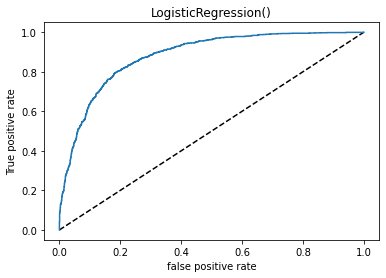

auc_score: 0.8010368583279804




In [204]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=lg)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(lg)
plt.show()
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print("auc_score:" ,auc_score)
print("\n")

0.8344605475040258
[[1283  287]
 [ 227 1308]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1570
           1       0.82      0.85      0.84      1535

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.84      0.83      0.83      3105



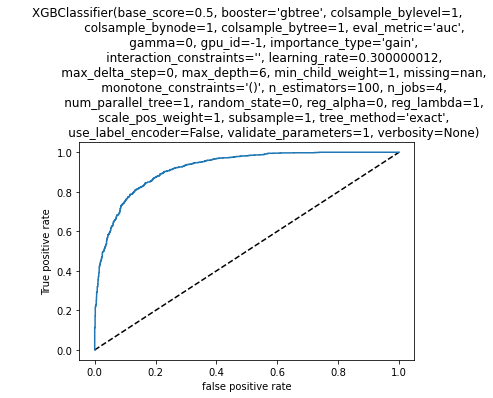

auc_score: 0.8346573580364738




In [22]:
from xgboost import XGBClassifier
xgb =XGBClassifier(eval_metric = 'auc', use_label_encoder=False, objective = 'binary:logistic')
xgb.fit(x_train,y_train)
xgb_pred=xgb.predict(x_test)
print(accuracy_score(y_test,xgb_pred))
print(confusion_matrix(y_test,xgb_pred))
print(classification_report(y_test,xgb_pred))
y_pred_prob=xgb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=xgb)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(xgb)
plt.show()
auc_score=roc_auc_score(y_test,xgb.predict(x_test))
print("auc_score:" ,auc_score)
print("\n")

### Checking the cross validation score:

In [206]:
from sklearn.model_selection import cross_val_score
dtscores=cross_val_score(dtc,x_over,y_over,cv=5)
print(dtscores)
print(dtscores.mean(),dtscores.std())

[0.71256039 0.73768116 0.81449275 0.80521991 0.82938618]
0.779868077883082 0.0460514652453469


In [207]:
rfscores=cross_val_score(rf,x_over,y_over,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.77198068 0.78985507 0.87439614 0.88835186 0.89560174]
0.8440370969662583 0.052291875932754764


In [208]:
lgscores=cross_val_score(lg,x_over,y_over,cv=5)
print(lgscores)
print(lgscores.mean(),lgscores.std())

[0.74782609 0.75024155 0.80096618 0.80376994 0.81150314]
0.7828613790414283 0.02784538568400484


In [209]:
xgbscores=cross_val_score(xgb,x_over,y_over,cv=5)
print(xgbscores)
print(xgbscores.mean(),xgbscores.std())

[0.73429952 0.77198068 0.87826087 0.88013533 0.89656839]
0.8322489568813145 0.06599022491071589


We can see Random Forest and XGB performed better. So, we will further tune them to see if accuracy inceases.

### Performing Hyper-Parameter Tuning:

In [25]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

##### -Random Forest Regressor

In [160]:
grid_param={
    'criterion':['gini','entropy'],
    'max_depth': [4,5,6,7,8],
    'n_estimators': [100,500],
    'max_features':['auto','sqrt','log2']
    
}

In [161]:
grid_search=RandomizedSearchCV(estimator=rf,param_distributions=grid_param,cv=5)

In [162]:
grid_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 500]})

In [163]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'n_estimators': 100, 'max_features': 'log2', 'max_depth': 8, 'criterion': 'gini'}


0.8386473429951691
[[1227  305]
 [ 196 1377]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1532
           1       0.82      0.88      0.85      1573

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



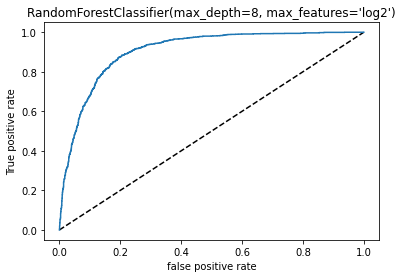

auc_score: 0.8381555840314445




In [164]:
rfc=RandomForestClassifier(criterion='gini',max_depth=8,max_features='log2',n_estimators=100)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))
y_pred_prob=rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=rfc)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(rfc)
plt.show()
auc_score=roc_auc_score(y_test,rfc.predict(x_test))
print("auc_score:" ,auc_score)
print("\n")

In [165]:
rfcscores=cross_val_score(rfc,x_over,y_over,cv=5)
print(rfcscores)
print(rfcscores.mean(),rfcscores.std())

[0.77149758 0.78454106 0.84444444 0.84823586 0.86128565]
0.8220009199524613 0.03657622572308497


##### - XGB Classifier

In [23]:
params_xgb = {'n_estimators': [100,400,800], 'learning_rate': [0.3,0.5,1],
             'max_depth': [6,8,15]}

In [26]:
grid_search=RandomizedSearchCV(estimator=xgb,param_distributions=params_xgb,cv=5)

In [27]:
grid_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           eval_metric='auc', gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=4,
                                           num_parallel_tree=1, random_state=0,
                                           reg_

In [28]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.5}


0.8405797101449275
[[1301  269]
 [ 226 1309]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1570
           1       0.83      0.85      0.84      1535

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



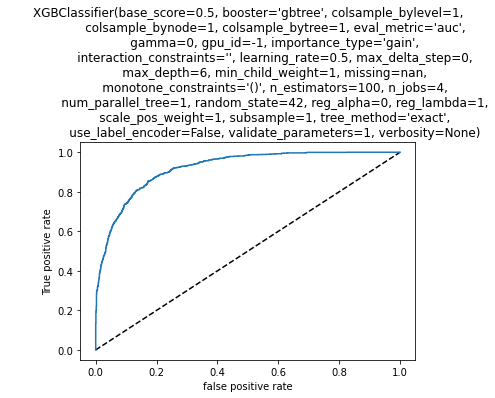

auc_score: 0.8407155750119297




In [29]:
xgbc =XGBClassifier(n_estimators=100 ,learning_rate=0.5 , max_depth= 6,eval_metric = 'auc', use_label_encoder=False, objective = 'binary:logistic',random_state=42)
xgbc.fit(x_train,y_train)
xgb_predc=xgbc.predict(x_test)
print(accuracy_score(y_test,xgb_predc))
print(confusion_matrix(y_test,xgb_predc))
print(classification_report(y_test,xgb_predc))
y_pred_prob=xgbc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=xgbc)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(xgbc)
plt.show()
auc_score=roc_auc_score(y_test,xgbc.predict(x_test))
print("auc_score:" ,auc_score)
print("\n")

In [174]:
xgbscores=cross_val_score(xgbc,x_over,y_over,cv=5)
print(xgbscores)
print(xgbscores.mean(),xgbscores.std())

[0.72028986 0.76280193 0.89082126 0.89995167 0.91058482]
0.8368899069073488 0.07924760799966452


We can see Random Forest Classifer and XGBoost classifier performed better than other models with accuracy of arount 84%.

### Saving the Model:

In [30]:
import joblib
joblib.dump(xgbc,'Churn.obj')

['Churn.obj']